#### CSE 452: Neural Networks and Fuzzy Systems Lab
Summer-2020, Dept. of CSE, NEUB <br>

#### Student Info
<b>Name:</b> Kutub uddin<br>
<b>Reg. No:</b> 170103020047

### Assignment 4: Radial Basis Function Network

In [1]:
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
import numpy as np
import math

<b>Dataset</b> <br>
Here,<br>
Training data shape is (NxD) 

In [2]:
np.random.seed(50)
X, y = make_moons(n_samples=500, noise=0.1)
X.shape


(500, 2)

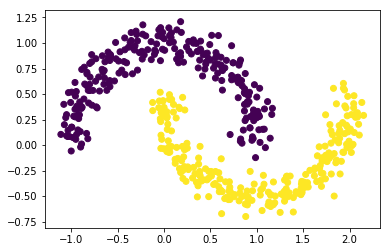

In [3]:
plt.scatter(X[:,0], X[:,1] ,c=y )

In [4]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)
print('Train shape: ', X_train.shape, y_train.shape)
print('Test shape: ',X_test.shape, y_test.shape)

Train shape:  (400, 2) (400,)
Test shape:  (100, 2) (100,)


<b>Task 1: Calculate Hidden Neuron Centroids</b>

K=12 <br>
Calculate Centroids using K-Means. <br>
Centroids shape should be (KxD) <br>
Print and plot the centroids with the data.

In [5]:
def get_random(k):
    centroids=[]
    while True:
        ri=np.random.choice(range(len(X)), k)
        print(ri)
        if len(ri)==k:
            for i in range(k):
                centroids.append(X[ri[i]])
            break

    return centroids

In [6]:
k=12
cen=get_random(k)

cen=np.array(cen)
print(cen)

[494 487 370 493 463 137 186 249 320 442 475 188]
[[ 1.88697529  0.19056934]
 [-0.07956796  0.99003252]
 [-0.03954443  0.25822416]
 [-0.22942088  1.08602227]
 [-0.01597555  0.9392524 ]
 [ 0.74505144  0.80548788]
 [ 1.70411452 -0.1428203 ]
 [-0.99217552  0.17486595]
 [-1.05840566  0.26947405]
 [ 2.04942118  0.12320352]
 [-1.04957054  0.29828166]
 [ 0.10135223  0.32315342]]


<b>Task 2: Calculate sigma value</b> <br>
The value of sigma is chosen according to maximum distance “d” between two hidden neurons
$$\sigma=\frac{d}{\sqrt{2k}}$$
where, d=maximum distance between two hidden centers. k=number of hidden neuron.

In [7]:
def find_sigma(cen):
    mx=[]
    for i in cen:
        max_dist = 0
        for j in range(len(cen)):
            
            s = np.sqrt(np.sum((i - cen[j])**2))
            #print(s)
            if s > max_dist:
                max_dist = s
        mx.append(max_dist)
    return mx
        

In [8]:
d=find_sigma(cen)
#print(d)
sigma=[]
for i in range(len(cen)):
    s=d[i]/np.sqrt(2*k)
    sigma.append(s)
print(sigma)


[0.6014390690064912, 0.4692186448170672, 0.42729809465665236, 0.5049810658567864, 0.45331186056224215, 0.3840447202380354, 0.5701426873971449, 0.6209528781430423, 0.6350847296475113, 0.6350847296475113, 0.6335877344719776, 0.39973702613096873]


<b>Task 3: Calculate Hidden Layer Activation</b> <br>
Here we use Gaussian function, $\mu$ is a receptor or cluster center.
radial distance, $$ r=||x-\mu|| $$
$$ \sigma =variance $$ [variance=spread of radial function]


$$\phi(x,\mu)=\frac{-||x-\mu||^2}{2\sigma^2}$$

Hidden layer activation, G shape should be (NxK)

In [9]:
#your code goes here.
def G_func(k,X,sigma,cen):
   
    
    G= np.empty((X.shape[0],k),dtype=float) 
    #print(G)
    for i in range(X.shape[0]): 
        for j in range(k):
            dist = np.linalg.norm(X[i]-cen[j])
            
            G[i][j] = math.exp(-math.pow(dist,2)/(2*math.pow(sigma[j],2)))
    return G

In [10]:
gussian=G_func(k,X_train,sigma,cen)
print(gussian)

[[1.05591406e-05 3.33566487e-02 8.17403905e-02 ... 1.04188300e-05
  9.77189834e-01 2.21346911e-02]
 [5.22601027e-05 1.46999795e-01 2.15588944e-01 ... 4.60065804e-05
  9.01446491e-01 8.85465810e-02]
 [5.06946589e-03 6.00149695e-01 8.31896947e-01 ... 3.66552037e-03
  2.65178624e-01 8.34130015e-01]
 ...
 [3.14615626e-01 1.23961179e-04 2.16150208e-03 ... 2.96774871e-01
  6.01548975e-04 1.95347551e-03]
 [1.00000000e+00 3.59217947e-05 3.80614479e-05 ... 9.62386538e-01
  2.13365745e-05 4.39690471e-05]
 [2.93464192e-04 7.60198946e-01 1.92273481e-01 ... 2.27756850e-04
  3.70804724e-01 1.32307082e-01]]


<b>Task 4: Train Weights</b> <br>
Let, rbf transformed data=G, weights=W and targets=A <br>
$$G.W=A$$ <br>
so, $$W=G^{-1}A$$ 

W shape should be (Kx1)

In [11]:
def wts(psi,y_train):
    
    ppt = np.dot(psi.T,psi)                
    ppti = np.linalg.pinv(ppt)             
    A = np.dot(ppti,psi.T)                 
    weights= np.dot(A,X_train)             
    return weights

In [12]:
w=wts(gussian,X_train)
print(w)
print(w.shape)

[[ 1.06713571  2.34475511]
 [11.31079649  6.76940653]
 [ 0.44309055 -1.04403407]
 [-4.33313235 -1.90986157]
 [-7.47261164 -4.16931428]
 [ 0.68007767  0.54796905]
 [ 1.2887932  -1.4533944 ]
 [ 1.30867707 -1.32708748]
 [-9.48219438 -9.3616766 ]
 [-0.09043594 -0.95549942]
 [ 7.23690638 11.02008898]
 [-0.08889204  0.92196783]]
(12, 2)


<b>Task 5: Classification accuracy</b> <br>
Now, classify the test data using the learned Hidden layer (centroids, sigma) and learned weights <br>
Accuracy should be greater than 95%

$G= rbf (Test_NxK) $ <br>
$A=G.W$

Use 0.5 as threshold.

In [13]:
def prediction(w,G):
    """
    Input: Takes input G and weights
    Takes sign of y_pred which is:
            {-1 if x < 0,0 if x==0,1 if x > 0
    Returns: predicted values by taking dot product of weights and G.
    
    """
    y_pred=G.dot(w)
    y_pred=np.sign(y_pred)
    return y_pred

In [14]:
p=prediction(w,gussian)
print(p)

[[-1.  1.]
 [-1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1. -1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1. -1.]
 [ 1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1. -1.]
 [-1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1. -1.]
 [ 1.  1.]
 [ 1. -1.]
 [ 1.  1.]
 [ 1. -1.]
 [ 1.  1.]
 [-1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1. -1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1. -1.]
 [ 1.  1.]
 [-1.  1.]
 [-1.  1.]
 [ 1. -1.]
 [ 1.  1.]
 [ 1.  1.]
 [-1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1. -1.]
 [ 1. -1.]
 [ 1. -1.]
 [-1.  1.]
 [ 1. -1.]
 [-1.  1.]
 [-1.  1.]
 [ 1. -1.]
 [ 1. -1.]
 [-1.  1.]
 [ 1.  1.]
 [-1.  1.]
 [ 1. -1.]
 [-1.  1.]
 [ 1.  1.]
 [ 1. -1.]
 [ 1. -1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1. -1.]
 [ 1.  1.]
 [ 1. -1.]
 [-1.  1.]
 [ 1. -1.]
 [ 1.  1.]
 [ 1.  1.]
 [-1.  1.]
 [ 1. -1.]
 [ 1.  1.]
 [ 1. -1.]
 [ 1. -1.]
 [-1.  1.]
 [ 1.  1.]
 [ 1. -1.]
 [-1.  1.]
 [-1.  1.]
 [ 1. -1.]
 [ 1. -1.]
 [ 1. -1.]
 [ 1. -1.]
 [-1.  1.]
 [ 1. -1.]
 [ 1. -1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1. -1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]

In [15]:
def accuracy_score_error(y_pred,y):
    """
    y_pred: predictions for train/test data
    y: Desired for train/test
    Returns:
      accuracy
      mean square error
    """
    c= 0
    for i in range(len(y)):
        if (y_pred[i] == y[i]).all():
            c= c+ 1
    n=len(y_pred)
    acc= c/n*100
    
    #mean square error
    mean_sq = 0
    for i in range(len(y_pred)):
        mean_sq = mean_sq + (math.pow((y_pred[i]-y[i]),2))
    mse_1 = mean_sq/len(y_pred)
    return acc,mse_1

In [16]:
ac=accuracy_score_error(p,X)
print(ac)

IndexError: index 400 is out of bounds for axis 0 with size 400

<b>Bonus Task: Plot decision boundary</b>

In [24]:
#your code goes here.

<b>1D Interpolation</b>

In [25]:
N=100
x = np.linspace(0, 10, N)
noise = np.random.uniform(-0.1, 0.1, N)
y = np.sin(x) +noise
x=x.reshape(-1,1)
x.shape

(100, 1)

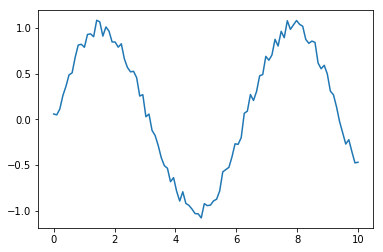

In [26]:
plt.plot(x,y)

<b>Task 6: Interpolation</b><br>
k=10 <br>

* calculate centroids, sigma (you can also use k random centroids, see what happens)
* calculate Hidden layer
* calculate weights
* predict $\hat{y}$
* plot the predicted $\hat{y}$ and actual $y$

In [27]:
#your code goes here.

<b>Task 7: Test Interpolation </b>

Calculate output for the following, <br>
tx=np.array([4,7,10])  <br>
Output should be near [-0.74,  0.64, -0.55] <br>

In [28]:
#your code goes here.

### Submission

1. Complete The Honor Code
2. Submit this notebook file to google classroom.

<b>Comment on google classroom if you have any questions</b>

### Honor Code
Plese type the following in the next cell. Replace the underlined text with your own. 

I am <u>full_name</u> bearing registration no. <u>202002</u> hereby declaring that I myself did my assignments, I didn't directly copy any code from others. I have a complete understanding of my code and can explain. I respect this honor code and I believe it will be useful to maintain academic integrity.<br>

Name: <u>FULL_Name</u><br>
Date: <u>dd/mm/yy</u>

_your__writing_